In [38]:
#importing library and loading the data
import numpy as np
import pandas as pd

#importing Chardet as the Encoding is different from the default one
import chardet
with open('companies.csv' ,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
#checking the charecter encoding might be
#if i use utf-8, windows-1252 etc i am getting some UnicodeDecodeError to overcome it iso-8859-1 does the job 
#creating the dataframe
companies = pd.read_csv("companies.csv" , encoding = 'iso-8859-1')
rounds2 = pd.read_csv("rounds2.csv" , encoding = 'iso-8859-1')

In [39]:
#checking for the unique company names in both the dataframes
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(len(rounds2['company_permalink'].unique()))

66368
66370


In [40]:
#checking if the companies present in round2 dataframe are not present in company dataframe 
rounds2.loc[rounds2['company_permalink'].isin(companies['permalink']) ,:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


since the above result shows 114942 rows, hen there is no new company that is present in rounds2 which is not present in companies dataframe


##### Merging companies and round2 Dataframe

In [41]:
#merging both the  dataframes
master_frame = pd.merge(companies,rounds2,how = "inner", left_on = "permalink", right_on= "company_permalink")
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

### Calculating the missing values 

In [42]:
#calculating the Total percentage of the Missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In the above results we could see that the total missing percentage for each and every column. now we carefully look at each and every column and see that if it requires any imputing of values.

firstly we can identify missing columns at the homepage_url, category_list, country_code, state_code, region, city, founded_at, funding_round_code and raised_amount_usd          

now columns that do not require any imputing of values as these columns are not revelant for our analysis and they are homepage_url, state_code, region, city, founded_at and funding_round_code

now we take the column country_code as this is having  missing values of 7.54 percentage in the entire DataFrame. This can be  imputed with the mode of the Column "country_code"

I choose to impute the Column country_code with the mode


In [43]:
#calculating the mod of the column Country_code
master_frame.country_code.mode()
# imputing the missing values in the column Country_code with USA
master_frame['country_code'] = master_frame['country_code'].fillna('USA')

for the column category_list I Choose to droup the missing values rows as they are only 2.96 in percentage

In [44]:
#droping the rows with NaN as the value in the column  category_list
master_frame['category_list']=master_frame['category_list'].fillna("")

As the Fund column "raised_amount_usd" is having a missing values in this, if i impute this column with any values, then my statistical parameters may be changed also imputing this is not a good idea as this is my target variabe for fund type analysis, i decided to ignore the rows in which the cell against the column raised_amount_usd is empty

In [45]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

the data cleaning for the intrested columns is done now again checking for the  percentage of missing values after data cleaning

In [46]:
#calculating the Total percentage of the Missing values in each column after data cleaning
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               0.00
status                      0.00
country_code                0.00
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

### Funding Type Analysis

In [47]:
#grouping the Data according to the Fund Type
master_group = master_frame.groupby('funding_round_type') 

#### calculating various statistical parameters for each group of Data


In [48]:

#calculating the median of the investment based on the groups of funding_round_type 
print(round(master_group['raised_amount_usd'].median()))

funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.0
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64


In [49]:
#calculating the Mean of the investment based on the groups of funding_round_type 
print(round(master_group['raised_amount_usd'].mean()))

funding_round_type
angel                       958694.0
convertible_note           1453439.0
debt_financing            17043526.0
equity_crowdfunding         538368.0
grant                      4300576.0
non_equity_assistance       411203.0
post_ipo_debt            168704572.0
post_ipo_equity           82182494.0
private_equity            73308593.0
product_crowdfunding       1363131.0
secondary_market          79649630.0
seed                        719780.0
undisclosed               19242370.0
venture                   11748949.0
Name: raised_amount_usd, dtype: float64


In [50]:
#calculating the total sum  of the investment based on the groups of funding_round_type 
print(round(master_group['raised_amount_usd'].sum()))

funding_round_type
angel                    4.659255e+09
convertible_note         2.103126e+09
debt_financing           1.138848e+11
equity_crowdfunding      6.611162e+08
grant                    9.134424e+09
non_equity_assistance    3.001782e+07
post_ipo_debt            2.564309e+10
post_ipo_equity          5.161061e+10
private_equity           1.419254e+11
product_crowdfunding     5.261686e+08
secondary_market         2.389489e+09
seed                     1.698824e+10
undisclosed              3.044143e+10
venture                  5.901262e+11
Name: raised_amount_usd, dtype: float64


most representative value of the investment amount is the median of the above data. as the difference in mean and median is more. there could be some outliers as the mean is greater that 15 million USD but the median for venture is less than 15 million USD

Based on the most representative investment amount calculated for venture, angel, seed, and private equity. The fund category that suites the for SPARX investment is venture as the mean for this type is in between 5 to 15 million USD

now as the investment type is decided upon, we filter the dataframe and consider only the rows which have the funding_round_type as venture 

In [51]:
#copying the dataframe for any further reference. mostly yhis can be used in the checkpoin6 for Graphs
master_frame_all_funding_round_type = master_frame
#considering the investment type(venture) only
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]

### Country Analysis


In [52]:
#grouping the dataframe by country code
master_group = master_frame.groupby('country_code') 
#getting the country names which has highest investment amount in all the sectors for choosed investment type (venture)
top_nine = master_group['raised_amount_usd'].sum().sort_values(ascending = False)[0:9]
print(top_nine)


country_code
USA    4.480170e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64


In [53]:
#extracting the list of top nine countries
top_nine_list = list(top_nine.index)
top_nine_list
#creating a new data frame "top9" with the top nine countires only
top9= master_frame[(master_frame.country_code.isin(top_nine_list))]

In [54]:
#grouping the top9 Dataframe to identify the top three english speeking counties based on there investement amount
top9_group = top9.groupby('country_code') 
top9_group['raised_amount_usd'].sum().sort_values(ascending = False)

country_code
USA    4.480170e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

depending on the Investment amount the top three English speaking countries are USA,GBR and IND

now that we know the top three countries we focus on only these countires so creaating a Dataframe with these countires only. then we will focus on the investment sector

In [55]:
#creating a list with top three country names
top_three_list = ['USA', 'GBR', 'IND']
#creating a Dataframe with top three countires only
top3 = top9[(top9.country_code.isin(top_three_list))]
top3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0


### Sector Analysis 1

##### **Cleaning the column category_list**

now we take the column category_list as we can see in this column we have multiple category for a investment so we wish to consider the first category as its main category assuming that the first category is main category

In [56]:
top3['primary sector']=top3['category_list'].apply(lambda x : x.split('|')[0] if '|' in x else x)
top3.head()

C:\Users\pranay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics


In [57]:
#loading the mapping file
mapping = pd.read_csv("mapping.csv")
# store the value and id variables in two separate arrays
# store the value variables in one list
value_vars = list(mapping.columns[1:])
# store the id variables in one list
id_vars = list(np.setdiff1d(mapping.columns, value_vars))


In [58]:
#melting the mapping dataframe
mapping_long_df = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars)
# remove rows having value=0
mapping_long_df = mapping_long_df[(mapping_long_df.value == 1)]
# droping the column value
mapping_long_df = mapping_long_df.drop('value', axis = 1)
#renaming the coluumn variable to main_sector
mapping_long_df = mapping_long_df.rename(columns = {'variable' : "main_sector"})

In [59]:
#Renaming the category_list column to primary sector so that the merging becomes easy
mapping_long_df = mapping_long_df.rename(columns = {'category_list' : "primary sector"})

In [60]:
#merging the dataframes
master_frame  = pd.merge(top3,mapping_long_df,how = "inner", on = "primary sector")
master_frame .head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.0,Media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.0,Media,Entertainment
9,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.0,Media,Entertainment


### creating country specific data frames

the conditions are first each data frame belongs to one country from the top three list, the fund tyoe should be venture already taken care in the above dataframes, the investment amount should be between 5 to 15 million USD

In [61]:
#creating dataframe for USA
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <=15000000)]
#creating DataFrame for GBR
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <=15000000)]
#creating DataFrame for IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <=15000000)]

#### Sector-wise Investment Analysis

In [62]:
#to calculate the total number of investments in D1
print("Total number of investments is ", round(D1['raised_amount_usd'].value_counts().sum()))
#To calculate the total amount of investment in D1
print("\nTotal invested amount is", round(D1['raised_amount_usd'].sum()),"\n")
#TO CALCULATE THE TOTAL NUMBER OF INVESTMENTS IN EACH SECTOR FOR D1
print(round(D1['main_sector'].value_counts().sort_values(ascending = False),2),"\n")
#calculating the total number of investment amount for each sector in D1
D1_group = D1.groupby('main_sector')
print(round(D1_group['raised_amount_usd'].sum().sort_values(ascending = False),2))
#storing the top three sectors in a list
D1_top_three_sector_list = D1['main_sector'].value_counts().sort_values(ascending = False)[0:3].index

Total number of investments is  11751

Total invested amount is 104956211901.0 

Others                                     3063
Cleantech / Semiconductors                 2387
Social, Finance, Analytics, Advertising    2008
News, Search and Messaging                 1664
Health                                      959
Manufacturing                               857
Entertainment                               630
Automotive & Sports                         183
Name: main_sector, dtype: int64 

main_sector
Others                                     2.722281e+10
Cleantech / Semiconductors                 2.198866e+10
Social, Finance, Analytics, Advertising    1.754635e+10
News, Search and Messaging                 1.471255e+10
Health                                     8.644301e+09
Manufacturing                              7.801044e+09
Entertainment                              5.449170e+09
Automotive & Sports                        1.591336e+09
Name: raised_amount_usd, dtype: float64


In [63]:
#to calculate the total number of investments in D2
print("Total number of investments is ", round(D2['raised_amount_usd'].value_counts().sum()))
#To calculate the total amount of investment in D2
print("\nTotal invested amount is ", round(D2['raised_amount_usd'].sum()),"\n")
#TO CALCULATE THE TOTAL NUMBER OF INVESTMENTS IN EACH SECTOR FOR D2
print(round(D2['main_sector'].value_counts().sort_values(ascending = False),2),"\n")
#calculating the total number of investment amount for each sector in D2
D2_group = D2.groupby('main_sector')
print(round(D2_group['raised_amount_usd'].sum().sort_values(ascending = False),2))
#storing the top three sectors in a list
D2_top_three_sector_list = D2['main_sector'].value_counts().sort_values(ascending = False)[0:3].index

Total number of investments is  577

Total invested amount is  5028704358.0 

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64 

main_sector
Others                                     1.249124e+09
Cleantech / Semiconductors                 1.136905e+09
Social, Finance, Analytics, Advertising    8.218884e+08
News, Search and Messaging                 6.157462e+08
Entertainment                              4.615111e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64


In [64]:
#to calculate the total number of investments in D3
print("Total number of investments is ", round(D3['raised_amount_usd'].value_counts().sum()))
#To calculate the total amount of investment in D3
print("\nTotal invested amount is ", round(D3['raised_amount_usd'].sum()),"\n")
#TO CALCULATE THE TOTAL NUMBER OF INVESTMENTS IN EACH SECTOR FOR D3
print(round(D3['main_sector'].value_counts().sort_values(ascending = False),2),"\n")
#calculating the total number of investment amount for each sector in D3
D3_group = D3.groupby('main_sector')
print(round(D3_group['raised_amount_usd'].sum().sort_values(ascending = False),2))

Total number of investments is  299

Total invested amount is  2683537552.0 

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64 

main_sector
Others                                     1.007410e+09
News, Search and Messaging                 4.338345e+08
Social, Finance, Analytics, Advertising    2.905435e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64


In [65]:
#storing the top three sectors in a list
D1_top_three_sector_list = D1['main_sector'].value_counts().sort_values(ascending = False)[0:3].index
#selecting the companies with highest investment in the top sector 
company_name = D1.loc[(D1.main_sector == D1_top_three_sector_list[0]) & (D1['raised_amount_usd'] == D1['raised_amount_usd'].max())]
first_sector_top_company_name = list(company_name.name)
print("the countries that received top funding for the first sector is")
print("\n",first_sector_top_company_name)
#finding the top investment amount in the second sector
highest_funding_amount_for_second_sector = D1['raised_amount_usd'].value_counts().sort_values(ascending = False).index
#finding the company names with highest investment in the second top sector
company_name = D1.loc[(D1.main_sector == D1_top_three_sector_list[1]) & (D1['raised_amount_usd'] == highest_funding_amount_for_second_sector[0])]
second_sector_top_company_name = list(company_name.name)
print("\nthe countries that received top funding for the second sector is\n")
print(second_sector_top_company_name)

the countries that received top funding for the first sector is

 ['Change Healthcare', 'Education.com', 'Schoology', 'Akorri Networks', 'AltoWeb', 'Avamar Technologies', 'Branch Metrics', 'Broadcast International', 'BTI Systems', 'Cape Clear Software', 'Cassatt', 'Certeon', 'Clinicient', 'Convio', 'CrossChx', 'WorkFusion', 'DataSynapse', 'Dataupia', 'Decisyon', 'Deploy Solution', 'Efreightsolutions Holdings', 'Enablon', 'FiftyThree', 'Formation Data Systems', 'FusionStorm', 'Ikanos', 'Imagine Communications', 'Infineta Systems', 'Infineta Systems', 'iPipeline', 'Kasenna', 'Lecorpio', 'Mendocino Software', 'NantMobile', 'NantMobile', 'NeoSystems', 'Quofore', 'Operax', 'Panzura', 'Qwilt', 'Rainfinity', 'ScienceLogic', 'ScienceLogic', 'Softricity', 'SRC Computers', 'StreamBase Systems', 'Tendril', 'ToutApp', 'TSheets', 'vArmour', 'Vettro', 'Vicarious', 'VIEO', 'Virtual Computer', 'Vontu', 'WhenU.com', 'Wily Technology', 'XenSource', 'Appcelerator', 'Approva', 'Aryaka Networks', 'Astute N

In [66]:
#storing the top three sectors in a list
D2_top_three_sector_list = D2['main_sector'].value_counts().sort_values(ascending = False)[0:3].index
#selecting the companies with highest investment in the top sector 
company_name = D2.loc[(D2.main_sector == D2_top_three_sector_list[0]) & (D2['raised_amount_usd'] == D2['raised_amount_usd'].max())]
first_sector_top_company_name = list(company_name.name)
print("the countries that received top funding for the first sector is")
print("\n",first_sector_top_company_name)
#finding the top investment amount in the second sector
highest_funding_amount_for_second_sector = D2['raised_amount_usd'].value_counts().sort_values(ascending = False).index
#finding the company names with highest investment in the second top sector
company_name = D2.loc[(D2.main_sector == D2_top_three_sector_list[1]) & (D2['raised_amount_usd'] == highest_funding_amount_for_second_sector[0])]
second_sector_top_company_name = list(company_name.name)
print("\nthe countries that received top funding for the second sector is\n")
print(second_sector_top_company_name)

the countries that received top funding for the first sector is

 ['Azure Solutions', 'EnvironmentIQ', 'ip.access', 'Tribold', 'Notonthehighstreet', 'SenSage', 'SilverRail Technologies']

the countries that received top funding for the second sector is

['Acacia Pharma', 'MISSION Therapeutics', 'Oxitec', 'Xenetic Biosciences', 'Iceotope', 'Aspex Semiconductor', 'Elixent', 'Global Silicon', 'Bitstamp']


In [67]:
#storing the top three sectors in a list
D3_top_three_sector_list = D3['main_sector'].value_counts().sort_values(ascending = False)[0:3].index
#selecting the companies with highest investment in the top sector 
company_name = D3.loc[(D3.main_sector == D3_top_three_sector_list[0]) & (D3['raised_amount_usd'] == D3['raised_amount_usd'].max())]
first_sector_top_company_name = list(company_name.name)
print("the countries that received top funding for the first sector is")
print("\n",first_sector_top_company_name)
#finding the top investment amount in the second sector
highest_funding_amount_for_second_sector = D3['raised_amount_usd'].value_counts().sort_values(ascending = False).index
#finding the company names with highest investment in the second top sector
company_name = D3.loc[(D3.main_sector == D3_top_three_sector_list[1]) & (D3['raised_amount_usd'] == highest_funding_amount_for_second_sector[0])]
second_sector_top_company_name = list(company_name.name)
print("\nthe countries that received top funding for the second sector is\n")
print(second_sector_top_company_name)

the countries that received top funding for the first sector is

 ['GirnarSoft', 'CaratLane', 'FirstCry.com', 'LimeRoad', 'Pepperfry.com', 'Roposo', 'Voylla Retail Pvt. Ltd.', 'Classteacher Learning Systems', 'K-12 Techno Services', 'Tejas Networks India', 'iPolicy Networks', 'CommonFloor', 'ZO Rooms', 'ItzCash Card Ltd.', 'Comat Technologies']

the countries that received top funding for the second sector is

['PepperTap', 'UrbanClap', 'Babajob', 'Bluestone.com', 'Four Interactive', 'Money On Mobile', 'Webshastra', 'GupShup', 'IMImobile', 'One97 Communications', 'SMS GupShup', 'Roadrunnr', 'Just Dial']


### Plots

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns

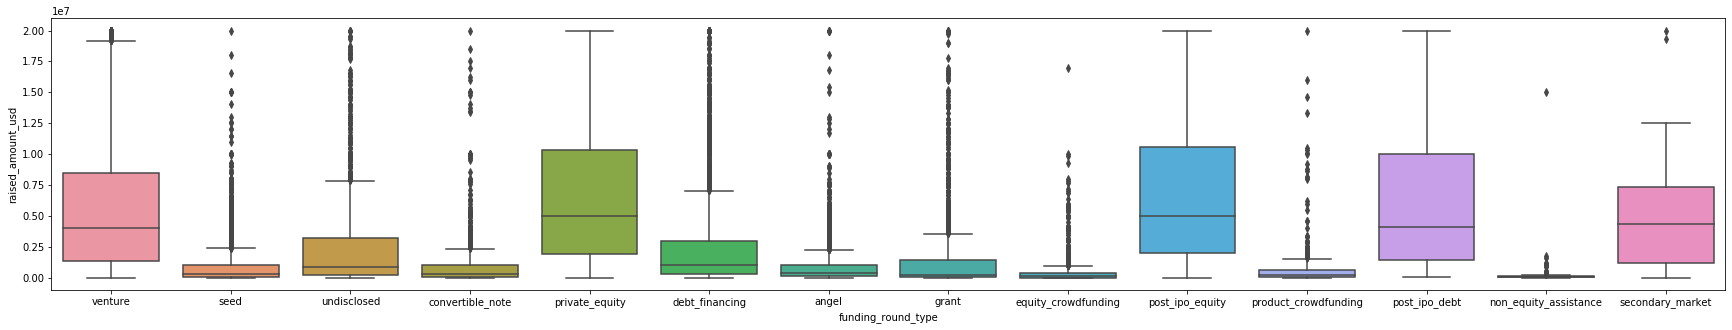

In [69]:
#plot showing the representative amount of investment in each funding type
plt.figure(figsize=(30, 5))
#removing the outliers by considering the 90% values for making the graph visible
upper_limit = master_frame_all_funding_round_type['raised_amount_usd'].quantile(q=0.9)
master_frame_all_funding_round_type = master_frame_all_funding_round_type[master_frame_all_funding_round_type['raised_amount_usd'] <=upper_limit]
#plotting the graph
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = master_frame_all_funding_round_type)

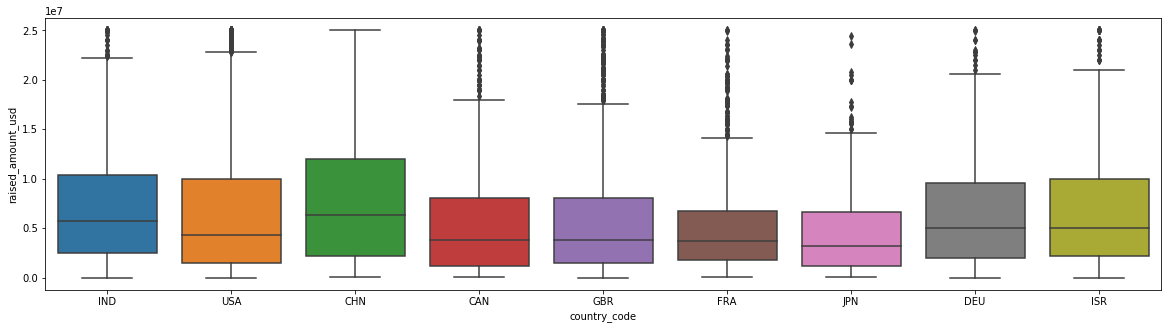

In [70]:
#plot that shows the country wise investment amount across all the sectors for the Fund Type Venture
plt.figure(figsize=(20, 5))
#removing the outliers by considering the 90% values for making the graph visible
upper_limit = top9.raised_amount_usd.quantile(q=0.9)
top9 = top9[top9['raised_amount_usd'] <= upper_limit]
#plotting the graph
sns.boxplot(x = 'country_code', y = 'raised_amount_usd', data = top9)

from the figure it is clear that USA has the highest amount if investment, then comes CHN, then is the GBR and following is IND

Text(0.5, 1.0, 'count of investment sector wise for Country IND')

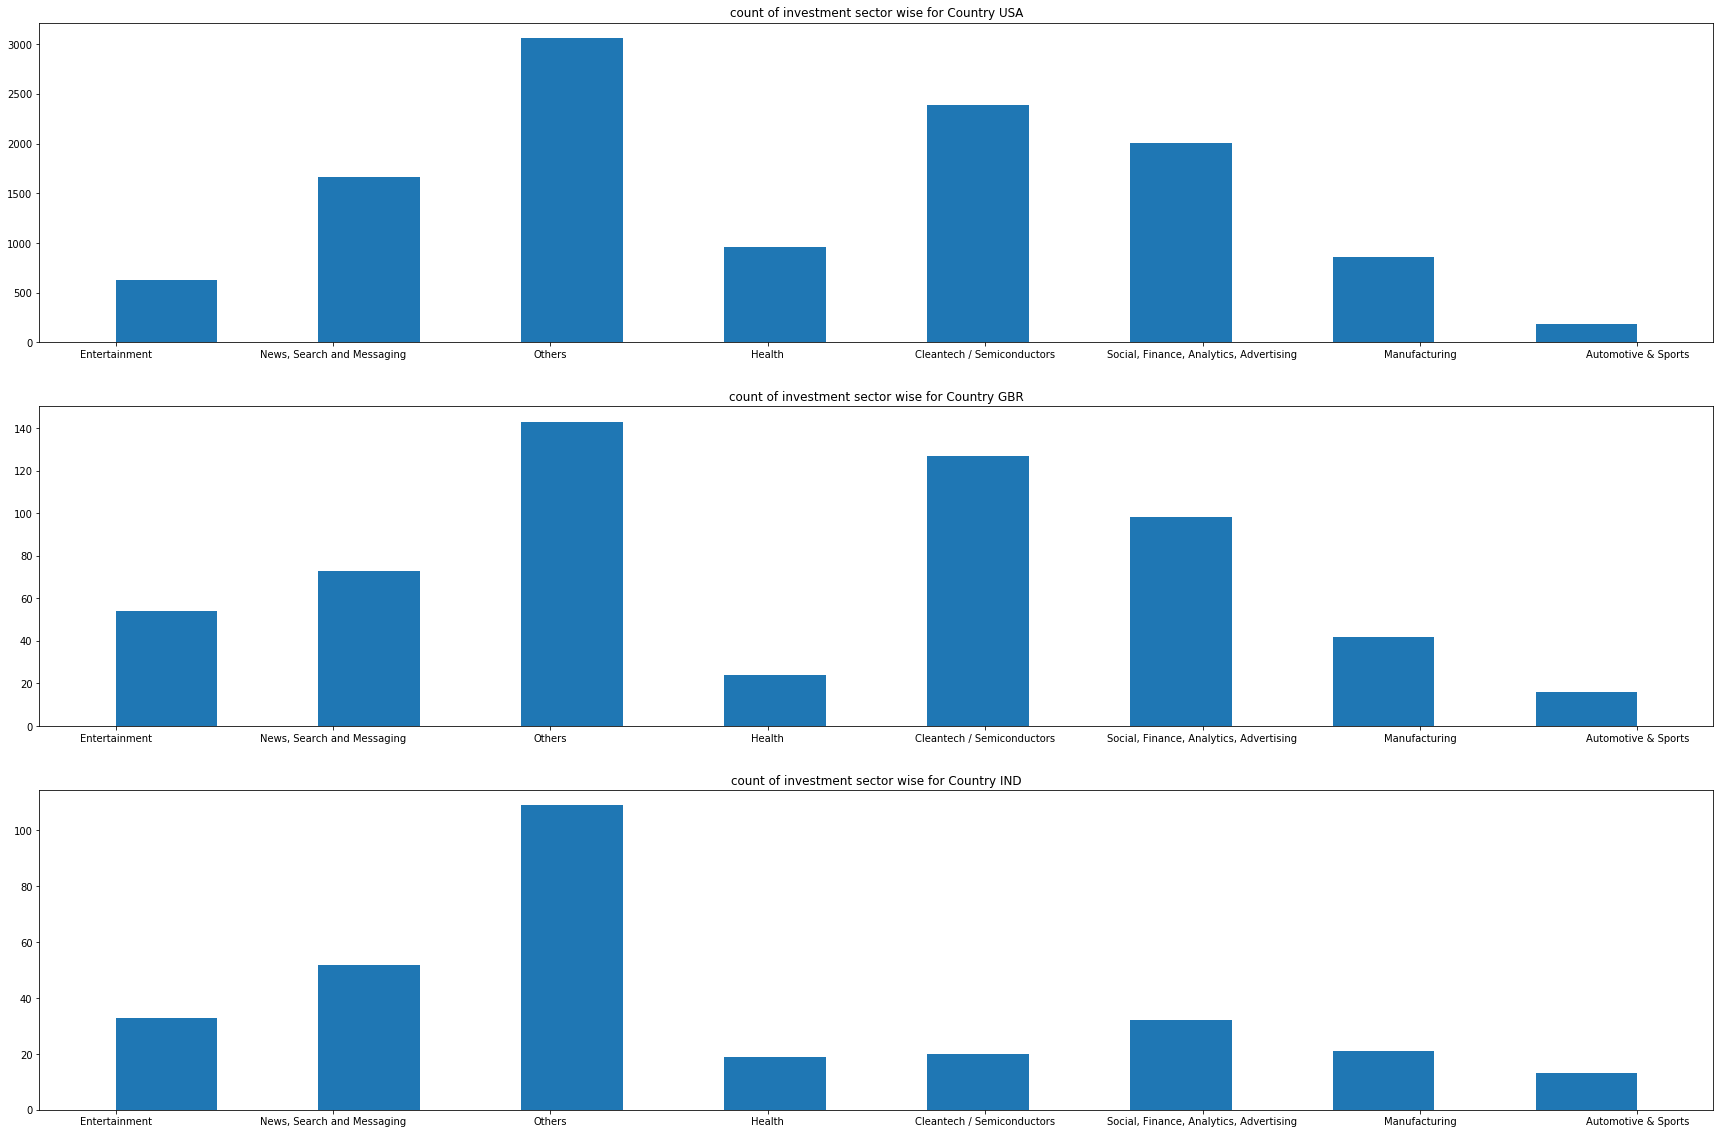

In [71]:
# number of investments in top sectors
#creating sub plots for each country
plt.figure(figsize=(30, 20))
plt.subplot(3,1,1)
plt.hist(D1.main_sector, bins = 15)
plt.title("count of investment sector wise for Country USA")
plt.subplot(3,1,2)
plt.hist(D2.main_sector, bins = 15)
plt.title("count of investment sector wise for Country GBR")
plt.subplot(3,1,3)
plt.hist(D3.main_sector, bins = 15)
plt.title("count of investment sector wise for Country IND")